<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/Week-8/UTS_CNN_Visual_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS DEEP LEARNING**
### **CNN (Convolutional Neural Network) – Visual Data**
Klasifikasi Ikan

## **Import Library**
Mengimpor semua library yang dibutuhkan untuk pemrosesan data, pembuatan model, evaluasi, dan visualisasi.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## **Menentukan Path Dataset**
Menetapkan path ke dataset ikan pada Google Drive.

In [ ]:
dataset_path = '/content/drive/MyDrive/utsdeepl/Types of fish-20250429T042410Z-1-001/Types of fish/FishImgDataset'

## **Menampilkan Struktur Folder Dataset**
Menampilkan isi folder utama dan subfolder train, val, dan test untuk memastikan struktur dataset sudah benar.

In [ ]:
# Cek struktur folder
print("Isi folder:")
print(os.listdir(dataset_path))

Isi folder:
['test', 'train', 'val']


In [ ]:
# Direktori untuk data training, validasi, dan testing
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')
test_dir = os.path.join(dataset_path, 'test')

In [ ]:
# Menampilkan isi folder
print("Train Dir:", os.listdir(train_dir))
print("Validation Dir:", os.listdir(val_dir))
print("Test Dir:", os.listdir(test_dir))

Train Dir: ['Tilapia', 'Snakehead', 'Pangasius', 'Silver Carp', 'Silver Perch', 'Silver Barb', 'Perch', 'Scat Fish', 'Tenpounder', 'Mullet', 'Jaguar Gapote', 'Knifefish', 'Indian Carp', 'Indo-Pacific Tarpon', 'Green Spotted Puffer', 'Mosquito Fish', 'Janitor Fish', 'Mudfish', 'Long-Snouted Pipefish', 'Freshwater Eel', 'Grass Carp', 'Goby', 'Catfish', 'Gourami', 'Climbing Perch', 'Black Spotted Barb', 'Gold Fish', 'Glass Perchlet', 'Fourfinger Threadfin', 'Bangus', 'Big Head Carp']
Validation Dir: ['Tenpounder', 'Tilapia', 'Pangasius', 'Perch', 'Silver Carp', 'Scat Fish', 'Mullet', 'Silver Barb', 'Snakehead', 'Silver Perch', 'Mosquito Fish', 'Knifefish', 'Green Spotted Puffer', 'Jaguar Gapote', 'Grass Carp', 'Janitor Fish', 'Mudfish', 'Long-Snouted Pipefish', 'Indo-Pacific Tarpon', 'Indian Carp', 'Glass Perchlet', 'Black Spotted Barb', 'Goby', 'Catfish', 'Big Head Carp', 'Climbing Perch', 'Freshwater Eel', 'Gourami', 'Fourfinger Threadfin', 'Gold Fish', 'Bangus']
Test Dir: ['Silver Carp

## **Visualisasi Distribusi Data Latih per Kelas**
Menghitung jumlah gambar pada setiap kelas di data latih, lalu menampilkannya dalam bentuk bar chart.

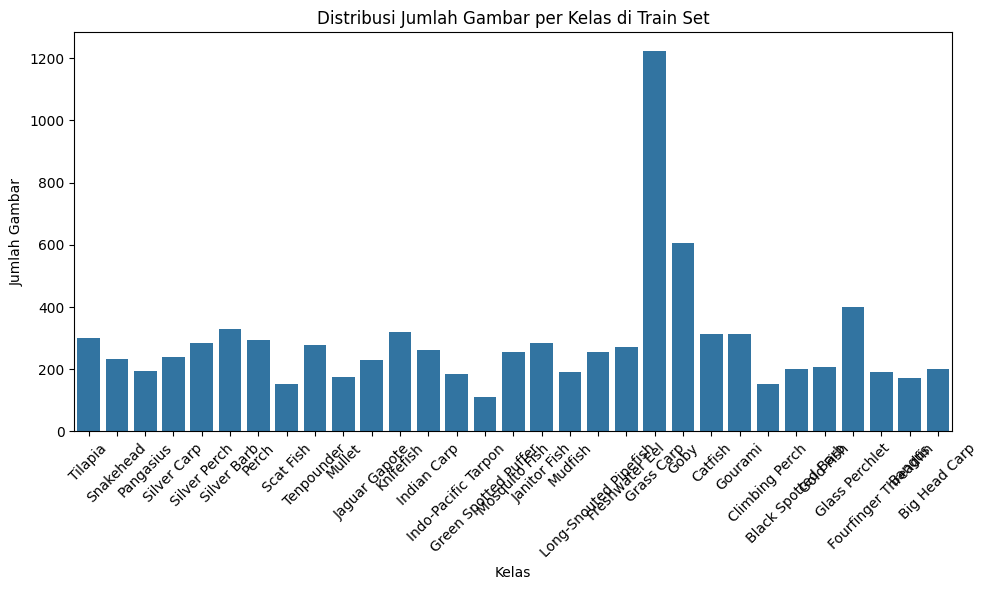

In [ ]:
# Ambil class count dari train dir
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Distribusi Jumlah Gambar per Kelas di Train Set')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Menampilkan Contoh Gambar dari Dataset**
Mengambil batch pertama dari data latih dan menampilkan 9 gambar dengan labelnya untuk pengecekan visual.

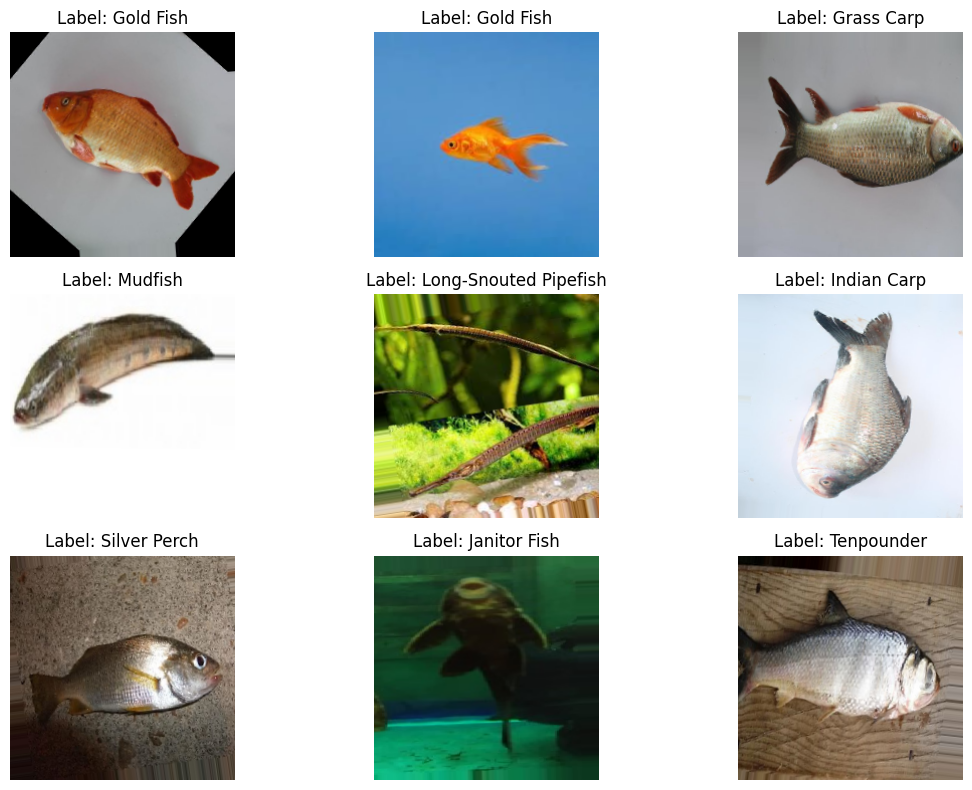

In [ ]:
# beberapa contoh gambar dari training set
class_names = list(train_generator.class_indices.keys())
images, labels = next(train_generator)  # ambil 1 batch gambar

plt.figure(figsize=(12, 8))
for i in range(9):  # tampilkan 9 gambar pertama
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = tf.argmax(labels[i]).numpy()
    plt.title(f'Label: {class_names[label_index]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## **Preprocessing dan Augmentasi Gambar**
Menyiapkan ImageDataGenerator untuk augmentasi gambar pada data latih dan normalisasi gambar pada data validasi dan testing.

In [ ]:
# Augmentasi dan preprocessing untuk data latih
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical')
validation_generator = val_test_datagen.flow_from_directory(val_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical')
test_generator = val_test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 8801 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.


🔎 Penjelasan:
flow_from_directory() membaca gambar dari struktur folder, folder nama = nama kelas → otomatis meng-encode ke angka (contoh: ['ikan_koi', 'ikan_nila'] → [0, 1]).

➡️ Ini setara dengan **LabelEncoder** (otomatis).

class_mode='categorical' mengubah label angka tersebut menjadi one-hot encoded vector.

➡️ Ini setara dengan **OneHotEncoder**.

In [ ]:
num_classes = train_generator.num_classes

## **Membangun Arsitektur Model Transfer Learning (MobileNetV2)**
Menggunakan arsitektur MobileNetV2 sebagai backbone pretrained, kemudian menambahkan layer custom (GlobalAveragePooling, Dense).

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

## **Kompilasi Model**
Meng-compile model dengan optimizer Adam dan loss function categorical_crossentropy.

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,761,887 (10.54 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 335,936 (1.28 MB)

## **Melatih Model dengan Early Stopping**
Melatih model menggunakan data train dan validasi dengan callback EarlyStopping untuk menghindari overfitting.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 750s 3s/step - accuracy: 0.4761 - loss: 1.9762 - val_accuracy: 0.7797 - val_loss: 0.7779
Epoch 2/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 676s 2s/step - accuracy: 0.7902 - loss: 0.7162 - val_accuracy: 0.8466 - val_loss: 0.5274
Epoch 3/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 664s 2s/step - accuracy: 0.8394 - loss: 0.5391 - val_accuracy: 0.8742 - val_loss: 0.4332
Epoch 4/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 665s 2s/step - accuracy: 0.8709 - loss: 0.4414 - val_accuracy: 0.8837 - val_loss: 0.3932
Epoch 5/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 675s 2s/step - accuracy: 0.8763 - loss: 0.4221 - val_accuracy: 0.8928 - val_loss: 0.3532


In [ ]:
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step


## **Evaluasi Model pada Data Test**
Memprediksi hasil pada test set dan menghitung metrik performa:
Accuracy, Precision, Recall, F1 Score, ROC AUC Score.

In [ ]:
# Metode Evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
try:
    roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_true), y_pred_probs, multi_class='ovr')
except ValueError:
    roc_auc = "Not applicable due to class imbalance or calculation issues"

# Print evaluasi
print("\n===== EVALUASI MODEL TRANSFER LEARNING =====")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc}")


===== EVALUASI MODEL TRANSFER LEARNING =====
Accuracy: 0.8886
Precision: 0.9036
Recall: 0.8886
F1 Score: 0.8889
ROC AUC Score: 0.9970846774938175


## **Confusion Matrix dan Classification Report**
Menghitung dan memvisualisasikan confusion matrix dari hasil prediksi pada data test serta Menampilkan classification report yang berisi precision, recall, f1-score untuk setiap kelas.

Confusion Matrix:
 [[ 32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   1   0   0   0   0   0   0   0   0   0]
 [  1  30   0   1   0   0   0   0   2   1   0   0   0   1   0   0   0   2
    0   0   0   1   0   1   0   0   0   0   0   2   1]
 [  0   0  24   0   4   0   0   3   3   0   0   0   0   0   1   0   1   0
    0   1   0   0   0   0   0   1   0   0   0   0   2]
 [  0   1   0  57   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   3   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  23   0   0   0   3   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0   2   0   0   1]
 [  1   0   0   0   0  26   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   1   5   2   0   0   0   0   0   0   2   0]
 [  0   0   0   3   1   0  45   0   0   0   0   0   0   0   0   0   0   0
    1   0   4   0   1   0   0   0   0   0   0   0   0]
 [  0   0   1   0   1   0   0  71   1   0   0   0   0   0   0   0   0   0
    

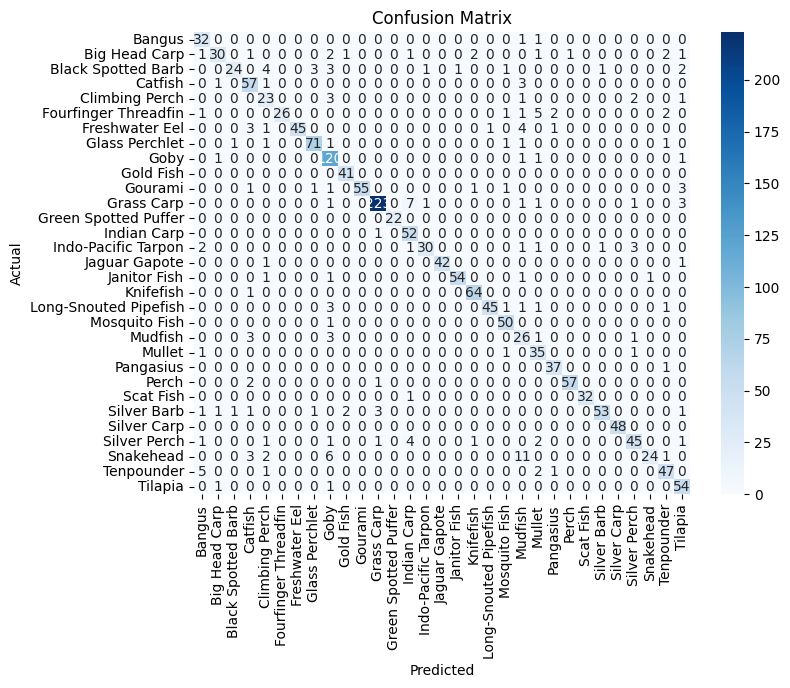

Classification Report:
                        precision    recall  f1-score   support

               Bangus       0.73      0.94      0.82        34
        Big Head Carp       0.88      0.70      0.78        43
   Black Spotted Barb       0.92      0.60      0.73        40
              Catfish       0.79      0.92      0.85        62
       Climbing Perch       0.64      0.77      0.70        30
 Fourfinger Threadfin       1.00      0.68      0.81        38
       Freshwater Eel       1.00      0.82      0.90        55
       Glass Perchlet       0.93      0.92      0.93        77
                 Goby       0.82      0.97      0.89       124
            Gold Fish       0.93      1.00      0.96        41
              Gourami       1.00      0.87      0.93        63
           Grass Carp       0.97      0.94      0.96       238
 Green Spotted Puffer       1.00      1.00      1.00        22
          Indian Carp       0.79      0.98      0.87        53
  Indo-Pacific Tarpon       0.

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:\n', cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:\n', classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

## **Visualisasi Learning Curve**
Menampilkan grafik akurasi dan loss selama proses pelatihan untuk melihat performa model dari waktu ke waktu.

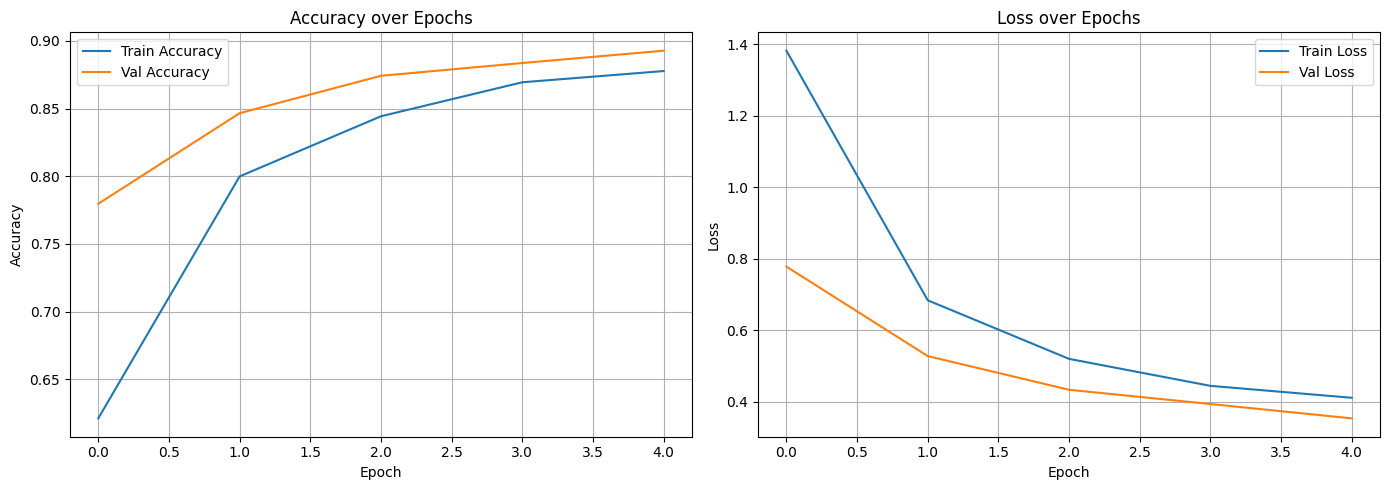

In [ ]:
# Visualisasi Learning Curves
plt.figure(figsize=(14, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Visualisasi Hasil Prediksi Model
Menampilkan 9 gambar dari test set dengan label asli dan label prediksi. Judul gambar akan berwarna hijau jika benar dan merah jika salah.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


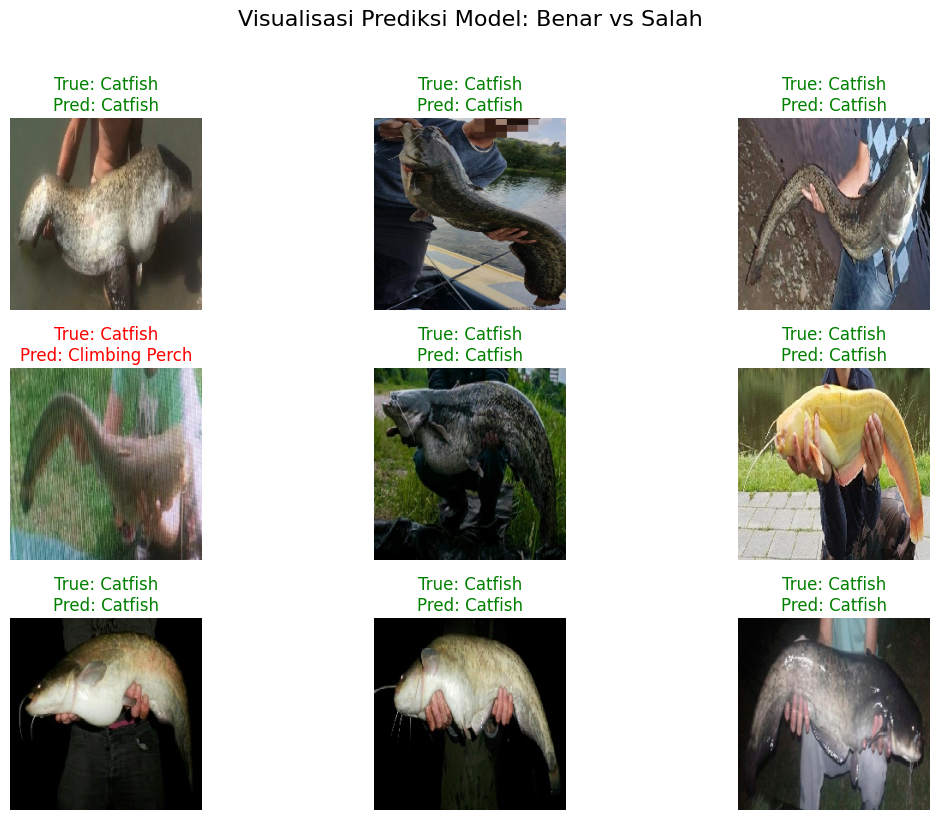

In [ ]:
# Ambil satu batch dari test set
x_test, y_true_batch = next(test_generator)
y_pred_batch = model.predict(x_test)
y_pred_class = np.argmax(y_pred_batch, axis=1)
y_true_class = np.argmax(y_true_batch, axis=1)

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
    true_label = list(test_generator.class_indices.keys())[y_true_class[i]]
    pred_label = list(test_generator.class_indices.keys())[y_pred_class[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}", color='green' if true_label == pred_label else 'red')
    plt.axis('off')
plt.suptitle("Visualisasi Prediksi Model: Benar vs Salah", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

True: Catfish tapi Pred: Climbing Perch ada beberapa faktor salah memprediksi
1. karena mirip visualnya
2. Kualitas Gambar Buruk (Blur, Noise, Pencahayaan)
3. Model Belum Cukup Belajar
dll

# **JAWABAN SOAL ANALISA**
---

### **1. Vanishing Gradient, Batch Normalization, dan Strategi Stabil Pembelajaran**

**Fenomena vanishing gradient:**
Terjadi ketika gradien yang dihitung selama backpropagation menjadi sangat kecil, terutama pada lapisan awal CNN yang dalam. Ini menyebabkan lapisan awal belajar sangat lambat atau tidak sama sekali. Ini umum saat menggunakan aktivasi seperti sigmoid/tanh, atau saat arsitektur terlalu dalam tanpa mekanisme stabilisasi.

**Mengapa bisa terjadi?**

* Lapisan awal menerima sinyal gradien yang sudah "teredam".
* Bobot tidak diperbarui dengan efektif karena update terlalu kecil.

**Batch Normalization memperburuk generalisasi jika:**

* Ditempatkan secara tidak tepat (misalnya setelah aktivasi, bukan sebelum).
* Mengganggu statistik distribusi internal data selama training dan inference, terutama pada dataset kecil.

**Strategi alternatif stabilisasi pembelajaran:**

* Gunakan *ResNet blocks* atau *skip connections* untuk memperlancar aliran gradien.
* Aktivasi ReLU (dengan perhatian terhadap dying ReLU).
* Gunakan weight initialization yang baik (He initialization).
* Gunakan arsitektur pretrained (transfer learning) seperti MobileNetV2 (seperti yang kamu lakukan).

---

### **2. Loss Stagnan setelah Ratusan Epoch**

**Tiga penyebab potensial:**

1. **Learning rate terlalu rendah** → update bobot sangat kecil, model tidak belajar signifikan.
2. **Inisialisasi bobot buruk** → semua neuron mengaktifkan output serupa, tidak membedakan fitur.
3. **Model terlalu kompleks** → kesulitan optimisasi, apalagi tanpa regularisasi.

**Mengapa Cyclic Learning Rate (CLR) membantu?**
CLR meningkatkan dan menurunkan learning rate secara periodik. Ini memungkinkan model "melompat keluar" dari local minima dan mencari area optimisasi yang lebih baik.

**Pengaruh momentum pada SGD:**
Momentum menambahkan "gaya dorong" pada arah gradien sebelumnya, sehingga:

* Mempercepat konvergensi.
* Menghindari jebakan local minima dangkal.
* Menstabilkan pembelajaran dengan gradien fluktuatif.

---

### **3. Dying ReLU dan Pengaruhnya**

**Dying ReLU:**
ReLU output-nya nol untuk input negatif. Jika terlalu banyak neuron hanya menghasilkan nol (karena bobot tidak diperbarui), neuron tersebut menjadi "mati" dan tidak pernah aktif kembali.

**Dampaknya:**

* Tidak ada gradien yang mengalir → neuron tidak belajar.
* Berpengaruh besar jika terjadi pada banyak neuron, terutama di lapisan awal.

**Solusi potensial:**

* Ganti ReLU dengan Leaky ReLU, ELU, atau Mish.
* Inisialisasi bobot dengan He Initialization untuk ReLU-based activations.
* Gunakan lower learning rate untuk menghindari pembaruan ekstrem.

---

### **4. AUC-ROC Kelas Spesifik Rendah**

**Class-weighted loss gagal jika:**

* Masalah bukan hanya ketidakseimbangan jumlah, tapi kualitas dan keragaman data.

**Tiga faktor penyebab kinerja buruk Spesies X:**

1. **Intraclass similarity terlalu rendah**: variasi dalam kelas terlalu besar.
2. **Interclass similarity tinggi**: mirip dengan kelas lain → classifier sulit membedakan.
3. **Underrepresentation visual features**: ciri khas visual spesies X tidak cukup kuat.

**Solusi:**

* Augmentasi khusus untuk kelas tersebut.
* Gunakan attention mechanism.
* Sampling strategi seperti SMOTE atau oversampling.

---

### **5. Overfitting saat Model Semakin Kompleks**

**Fenomena overfitting:**
Model belajar terlalu banyak dari data latih, termasuk noise dan detail tidak penting, tapi gagal generalisasi ke data baru (validasi).

**Kenapa menambah kapasitas bisa memperburuk performa:**

* Model terlalu "pintar" dan hanya menghafal, bukan memahami pola umum.
* Butuh lebih banyak data untuk model yang kompleks.

**Tiga kesalahan desain arsitektur:**

1. Terlalu banyak parameter tanpa regularisasi (dropout, L2).
2. Tidak ada early stopping saat val\_loss mulai naik.
3. Pooling layer minim atau hilang, menyebabkan model menangkap detail terlalu spesifik.

---


## ✅ **KESIMPULAN: METRIK EVALUASI TERBAIK UNTUK KASUS INI**

### **Hasil Model:**

* Accuracy: 88.86%
* Precision: 90.36%
* Recall: 88.86%
* F1 Score: 88.89%
* ROC AUC: **0.997**

### **Metrik terbaik: ROC AUC Score**

**Alasan:**

* ROC AUC mengukur **kemampuan model membedakan antar kelas secara menyeluruh**, tanpa bergantung pada threshold.
* Skor **0.997** menunjukkan pemisahan kelas yang hampir sempurna, bahkan lebih informatif daripada akurasi atau F1.
* Sangat cocok untuk **multi-class classification dengan class imbalance** seperti klasifikasi spesies ikan.

---

### **Ringkasan Kesimpulan:**

* **ROC AUC Score = metrik terbaik** karena mencerminkan performa klasifikasi secara menyeluruh di semua threshold.
* **F1 Score** juga penting karena menunjukkan keseimbangan presisi dan recall.
* Akurasi bisa menipu jika ada kelas dominan → tidak cukup kuat sebagai metrik utama.

---


